In [1]:
import numpy as np
import scipy.stats as stats

# Step 1: Simulate 100 values from Binomial(p)
n = 100  # number of trials
p_true = 0.6  # true probability of success
x = np.random.binomial(1, p_true, n)  # Simulating 100 Bernoulli trials

# Step 2: Bayesian Estimation with Normal Prior
mu_prior = 0.5  # Mean of prior
sigma_prior = 0.1  # Standard deviation of prior

# Likelihood parameters
alpha = mu_prior * ((1 - mu_prior) / sigma_prior**2 - 1)
beta = (1 - mu_prior) * ((1 - mu_prior) / sigma_prior**2 - 1)

# Posterior parameters
alpha_post = alpha + sum(x)
beta_post = beta + (n - sum(x))

# Bayes estimator (Posterior Mean)
p_bayes = alpha_post / (alpha_post + beta_post)

# Step 3: Classical Estimator (Maximum Likelihood Estimator)
p_mle = np.mean(x)

# Step 4: 95% Posterior Interval Estimate
posterior_ci = stats.beta.interval(0.95, alpha_post, beta_post)

# Step 5: 95% Classical Interval Estimate (Wald Confidence Interval)
se_mle = np.sqrt((p_mle * (1 - p_mle)) / n)
classical_ci = (p_mle - 1.96 * se_mle, p_mle + 1.96 * se_mle)

# Print results
print(f"Bayes Estimator: {p_bayes:.4f}")
print(f"Classical (MLE) Estimator: {p_mle:.4f}")
print(f"95% Posterior Interval Estimate: {posterior_ci}")
print(f"95% Classical Interval Estimate: {classical_ci}")

Bayes Estimator: 0.6208
Classical (MLE) Estimator: 0.6800
95% Posterior Interval Estimate: (np.float64(0.5417470277754243), np.float64(0.6967912848884296))
95% Classical Interval Estimate: (np.float64(0.5885706742888257), np.float64(0.7714293257111744))


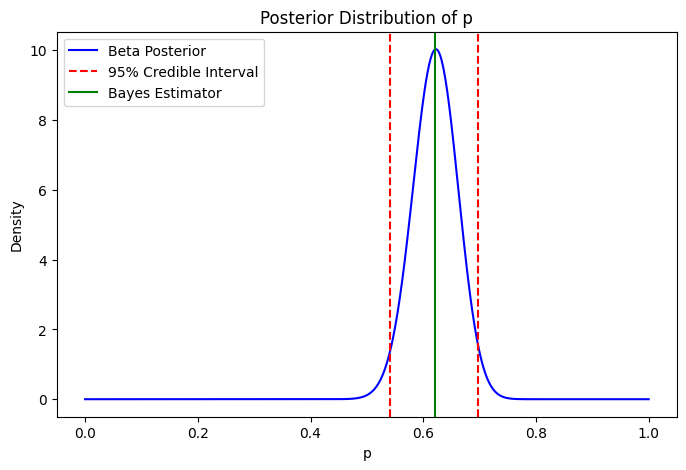

In [2]:
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 1, 1000)
posterior_pdf = stats.beta.pdf(x_vals, alpha_post, beta_post)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, posterior_pdf, label="Beta Posterior", color='blue')
plt.axvline(posterior_ci[0], color='red', linestyle='--', label="95% Credible Interval")
plt.axvline(posterior_ci[1], color='red', linestyle='--')
plt.axvline(p_bayes, color='green', linestyle='-', label="Bayes Estimator")
plt.xlabel("p")
plt.ylabel("Density")
plt.title("Posterior Distribution of p")
plt.legend()
plt.show()